In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("simplelinearregression.csv")
print(df.head())

   Age  Premium
0   18    10000
1   22    15000
2   23    18000
3   26    21000
4   28    24000


In [4]:
print(df.isnull().sum().sum())

0


In [5]:
X = df[["Age"]]
y = df["Premium"]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()
model.fit(X_poly_train, y_train)


LinearRegression()

In [12]:
y_pred = model.predict(X_poly_test)

In [13]:
print("\n--- Polynomial Regression (degree=2) ---")
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


--- Polynomial Regression (degree=2) ---
R²: 0.9729098193833724
MSE: 204869.49091324638


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


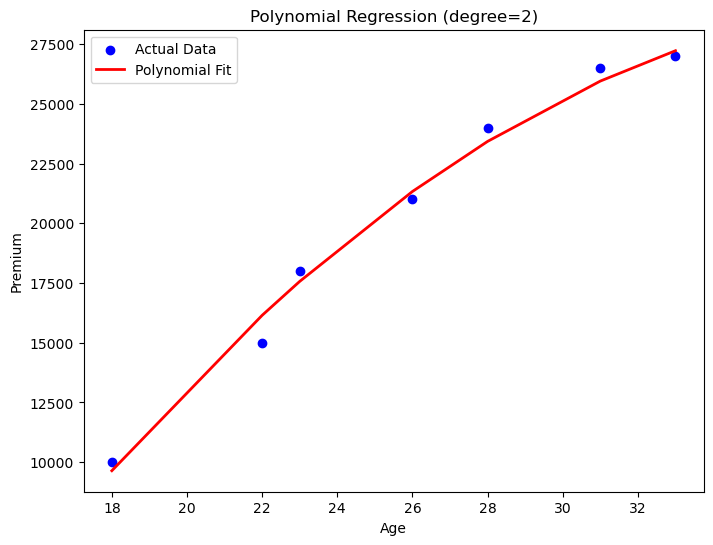

In [14]:
plt.figure(figsize=(8,))
plt.scatter(X, y, color='blue', label='Actual Data')
X_sorted = np.sort(X.values.reshape(-1,1), axis=0)
X_poly_sorted = poly.transform(X_sorted)
y_sorted_pred = model.predict(X_poly_sorted)
plt.plot(X_sorted, y_sorted_pred, color='red', linewidth=2, label='Polynomial Fit')
plt.xlabel("Age")
plt.ylabel("Premium")
plt.title("Polynomial Regression (degree=2)")
plt.legend()
plt.show()